In [32]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

import matplotlib.pyplot as plt
import tadasets
import warnings
warnings.filterwarnings("ignore")



In [149]:
#Code adapted from https://ripser.scikit-tda.org/en/latest/notebooks/Representative%20Cocycles.html
#Reorganized and comment by Sixuan Chen and Chris Longley
def drawLineColored(X, C):
    for i in range(X.shape[0]-1):
        plt.plot(X[i:i+2, 0], X[i:i+2, 1], c=C[i, :], lineWidth = 3)

def plotCocycle2D(D, X, cocycle, thresh):
    """
    Given a 2D point cloud X, display a cocycle projected
    onto edges under a given threshold "thresh"
    """
    #Plot all edges under the threshold
    N = X.shape[0]
    #set up the color for the straight line
    t = np.linspace(0, 1, 10)
    c = plt.get_cmap('GnBu')
    C = c(np.array(np.round(np.linspace(0, 255, len(t))), dtype=np.int32))
    C = C[:, 0:3]
    # Draw lines with color changed for 10 times 
    # Set up the coordination 
    for i in range(N):
        for j in range(N):
            if   D[i, j] <= thresh:
            #if  (D[i, j]>= thresh-0.01) | (D[i, j] <= thresh):
                Y = np.zeros((len(t), 2))
                Y[:, 0] = X[i, 0] + t*(X[j, 0] - X[i, 0])
                Y[:, 1] = X[i, 1] + t*(X[j, 1] - X[i, 1])
                drawLineColored(Y, C)
    #Plot cocycle projected to edges under the chosen threshold
    for k in range(cocycle.shape[0]):
        [i, j, val] = cocycle[k, :]
        #if (D[i, j]>= thresh-0.01) | (D[i, j] <= thresh):
        if  D[i, j] <= thresh:
            [i, j] = [min(i, j), max(i, j)]
            a = 0.5*(X[i, :] + X[j, :])
            plt.text(a[0], a[1], '%g'%val, color='b')
    #Plot vertex labels
    for i in range(N):
        plt.text(X[i, 0], X[i, 1], '%i'%i, color='r')
    plt.axis('equal')


## Generate 15 data points

In [187]:
np.random.seed(12)
x = tadasets.dsphere(n=15, d=1, noise=0.1)
print(x)


[[ 0.51737108 -0.82541884]
 [ 0.16262075 -1.02842793]
 [ 0.41515748 -0.8904039 ]
 [-0.05711436 -1.07047758]
 [-0.26698109  0.89491905]
 [-0.84175704  0.60945537]
 [ 0.80332546 -0.71072705]
 [ 0.96212583 -0.14914895]
 [ 0.73085165 -0.44583756]
 [-0.96282969  0.81507901]
 [ 0.98704515  0.35340154]
 [ 0.65731764  0.8468882 ]
 [-0.3623387  -0.89179574]
 [-0.66913622 -0.80006129]
 [-0.95490606 -0.29447654]]


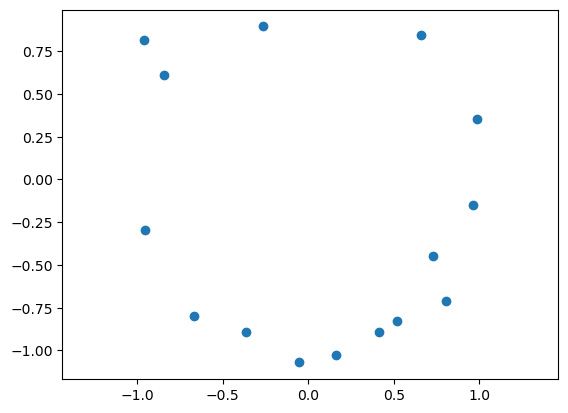

In [203]:
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()

In [190]:
result = ripser(x, coeff=17, do_cocycles=True)

diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

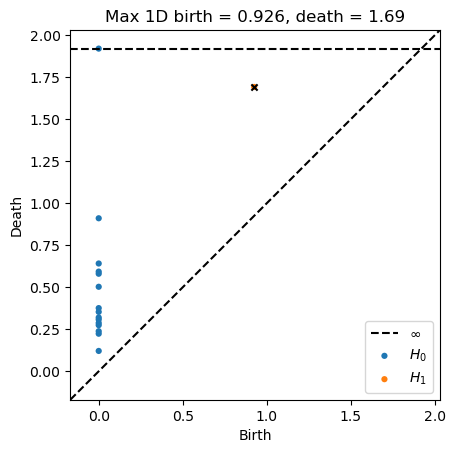

In [191]:
dgm1 = diagrams[1]
#fine the homology that last for the longest time(distance)
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

## A ring shape is succusfully identified for distance longer less or equal to 1.69.

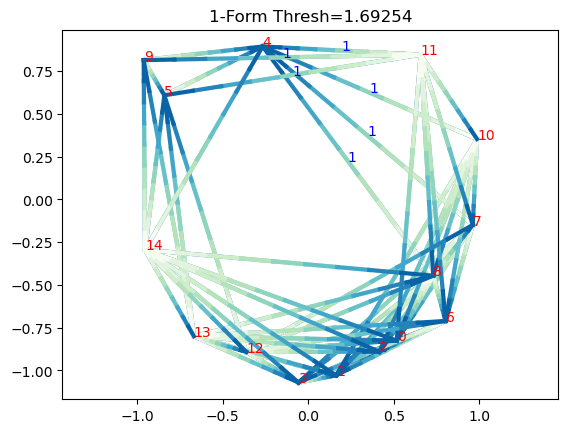

In [192]:
cocycle = cocycles[1][idx]
thresh = dgm1[idx, 1] #Project cocycle onto edges less than or equal to death time
plotCocycle2D(D, x, cocycle, thresh)
plt.title("1-Form Thresh=%g"%thresh)
plt.show()

## This ring shape arises after the distance is greater or equal to 0.48.

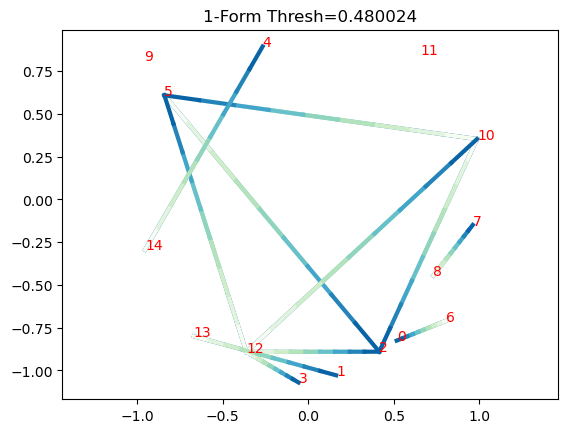

In [201]:
thresh = dgm1[idx, 0] #Project cocycle onto edges that have lengths less than or equal to the birth time
plotCocycle2D(D, x, cocycle, thresh)
plt.title("1-Form Thresh=%g"%thresh)
plt.show()

In [241]:
np.random.seed(12)
x1 = tadasets.dsphere(n=500, d=2, noise=0.1)


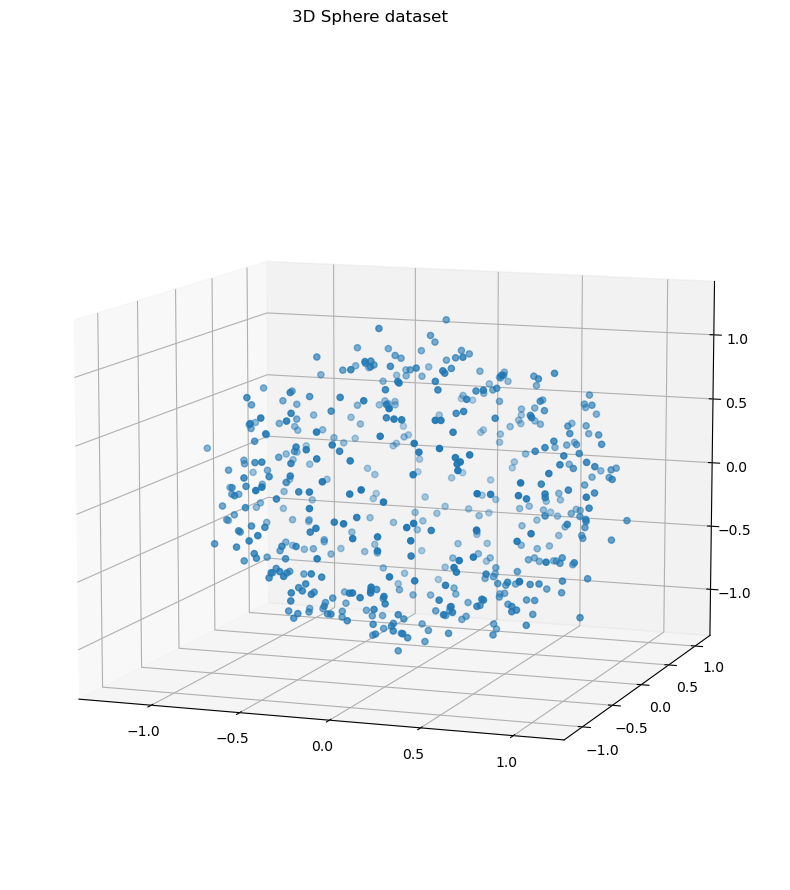

In [246]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection = '3d')
plt.suptitle("3D Sphere dataset")
ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2])
ax.view_init(10, -70) #change the viewing angle
plt.show()

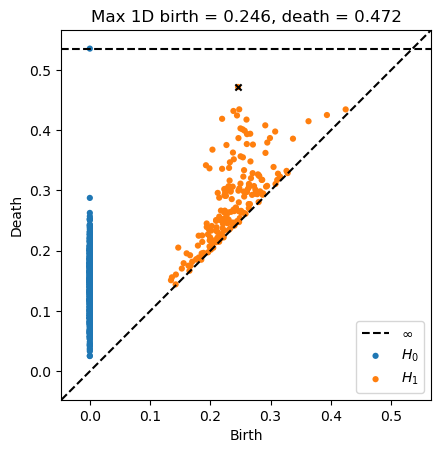

In [253]:
result = ripser(x1, coeff=17, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']
dgm1 = diagrams[1]
#fine the homology that last for the longest time(distance)
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

## The dimension of the data is too high such that we cannot find a topology structure that significantly different from other topology structures. This means we need to apply for common dimensional reduction method such isomap, firstly then apply for persistent homology.

In [247]:
#isomap using the sklearn
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=3,n_components=2) #using K=6 for your neighborhood size
iso.fit(x1)
x1_2D=iso.transform(x1)

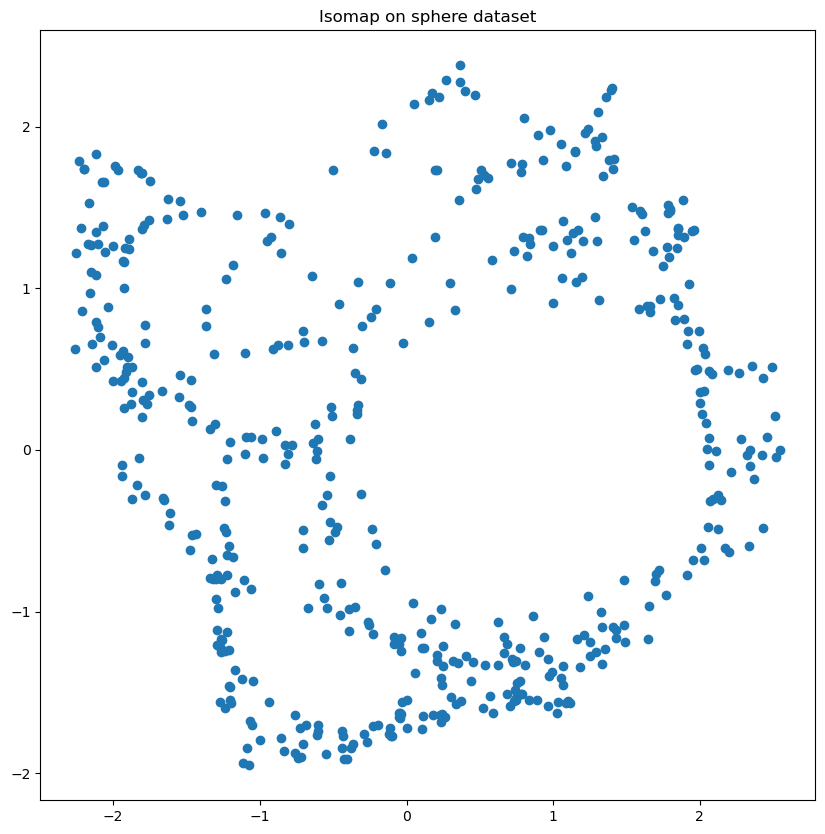

In [248]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.scatter(x1_2D[:, 0], x1_2D[:, 1])
plt.title("Isomap on sphere dataset")
plt.show()

## Successfully find the underlying special topology shape that significantly different from others after applying dimensional reduction isomap

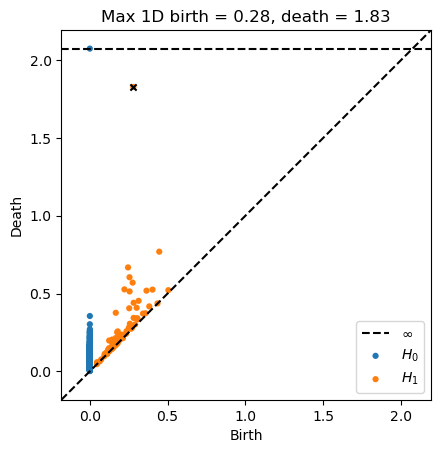

In [252]:
result = ripser(x1_2D, coeff=17, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']
dgm1 = diagrams[1]
#fine the homology that last for the longest time(distance)
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

In [325]:
# Generate a data with two underlying ring structure
#algorithm  adapted form https://github.com/brittAnderson/mind-theory-math-code/tree/main/code/isomap-swiss-roll/python
#generate angle for 4 Pi data with noise
n_size = 400
angle_range = 4 * np.pi * (np.random.rand(1, n_size) -0.5)
x = np.sin(angle_range)
y = np.random.rand(1, n_size)
z = np.sign(angle_range) * (np.cos(angle_range) - 1)
data_eight = np.concatenate((x, y, z)).T


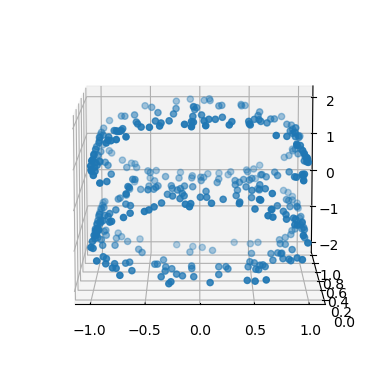

In [326]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(data_eight[:, 0], data_eight[:, 1], data_eight[:, 2])
ax.view_init(10, -90) #change the viewing angle
plt.show()

In [331]:
#isomap using the sklearn
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=6,n_components=2) #using K=4 for your neighborhood size
iso.fit(data_eight)
data_eight_2D=iso.transform(data_eight)

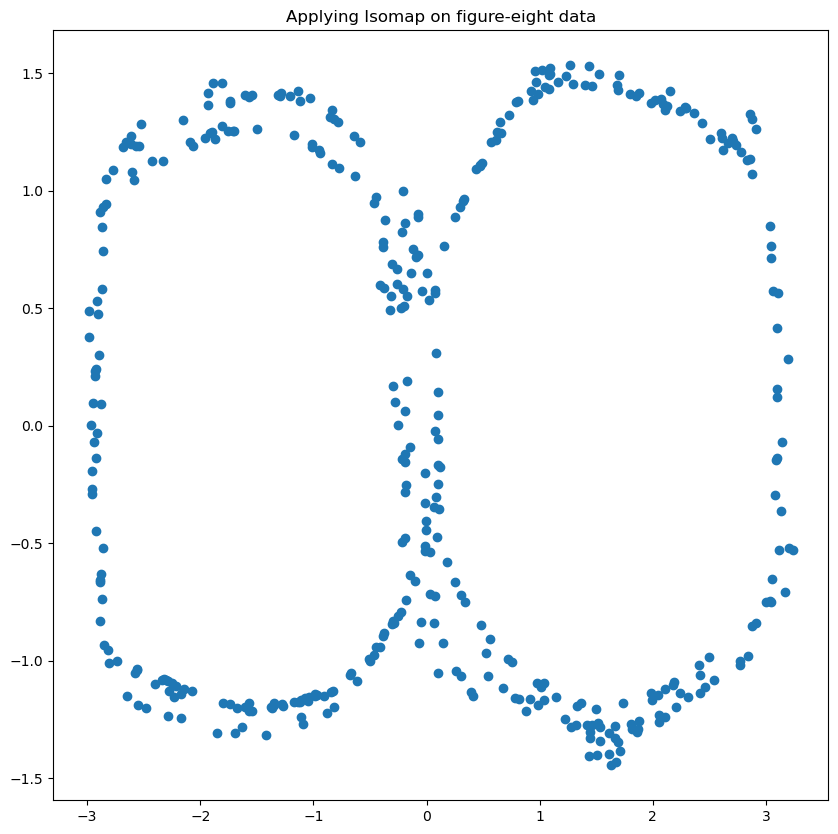

In [332]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.scatter(data_eight_2D[:, 0],data_eight_2D[:, 1])
plt.title("Applying Isomap on figure-eight data")
plt.show()

In [333]:
result = ripser(data_eight_2D, coeff=10, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

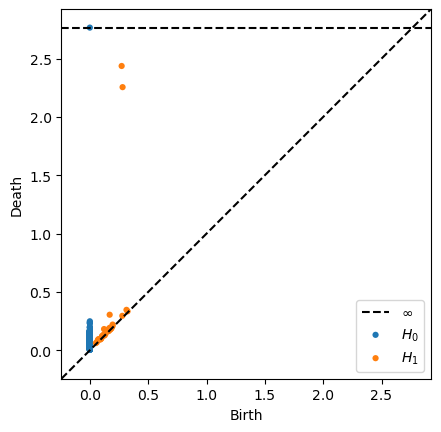

In [334]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.show()